# some material
   
### Is the data shuffled during training?

Yes, if the shuffle argument in model.fit is set to True (which is the default), the training data will be randomly shuffled at each epoch.

Validation data is never shuffled.

In [1]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import tensorflow as tf
# np.random.seed(2016) 
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from matplotlib import pyplot as plt


Using TensorFlow backend.


# todo
0. check whether the gradient decent is not shuffled  ---- done 
1. make the intilization the same   --- done 
2. make the datasets clustered  ----done 
3. randomized the clustered batch but its clusterng


# the original complex keras model

In [2]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
47616/60000 [======================>.......] - ETA: 8s - loss: 0.3761 - acc: 0.8855

KeyboardInterrupt: 

# a simpler SGD model

In [3]:

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s - loss: 0.6508 - acc: 0.8433 - val_loss: 0.3052 - val_acc: 0.9128
Epoch 2/12
60000/60000 [==============================] - 17s - loss: 0.2870 - acc: 0.9184 - val_loss: 0.2448 - val_acc: 0.9317
Epoch 3/12
60000/60000 [==============================] - 17s - loss: 0.2360 - acc: 0.9328 - val_loss: 0.2077 - val_acc: 0.9390
Epoch 4/12
60000/60000 [==============================] - 17s - loss: 0.2025 - acc: 0.9430 - val_loss: 0.1859 - val_acc: 0.9463
Epoch 5/12
60000/60000 [==============================] - 17s - loss: 0.1789 - acc: 0.9497 - val_loss: 0.1631 - val_acc: 0.9530
Epoch 6/12
60000/60000 [==============================] - 17s - loss: 0.1590 - acc: 0.9551 - val_loss: 0.1594 - val_acc: 0.9542
Epoch 7/12
60000/60000 [==============================] - 17s - loss: 0.1444 - acc: 0.9588 - val_loss: 0.1364

In [7]:

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
17s - loss: 0.7178 - acc: 0.8193 - val_loss: 0.3196 - val_acc: 0.9094
Test loss: 0.319608975106
Test accuracy: 0.9094


# KERAS SGD TESTING
start from here we are testing the keras SGD random or not, we use small sample of data

In [2]:

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:

# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train = x_train[:5000]

In [7]:
y_train = y_train[:5000]

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
x_test=x_test[:1000]

In [10]:
y_test=y_test[:1000]

In [11]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (5000, 28, 28, 1)
5000 train samples
1000 test samples


In [12]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [13]:

with tf.device('/gpu:1'):
    # np.random.seed(2016) 
    batch_size = 50
    epochs = 1



    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['acc'])

    batch_history = LossHistory()

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks = [batch_history])
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(batch_history.losses)

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 8s - loss: 1.4065 - acc: 0.6968 - val_loss: 0.7591 - val_acc: 0.8070
Test loss: 0.759067568779
Test accuracy: 0.807
[2.3049223, 2.2985256, 2.2503564, 2.23441, 2.2234449, 2.2072704, 2.1865511, 2.2155533, 2.1858051, 2.1327934, 2.1990898, 2.1380169, 2.1394863, 2.103225, 2.0474067, 2.0465572, 2.0727258, 1.9859893, 2.041285, 1.9573172, 1.9655675, 1.9812416, 1.9547147, 1.9515655, 2.0535624, 1.8622813, 1.8708495, 1.8733219, 1.8495508, 1.8177255, 1.7837791, 1.8093818, 1.7864228, 1.7551713, 1.6808974, 1.6290058, 1.7298985, 1.6548636, 1.5631753, 1.6652234, 1.4998133, 1.4984107, 1.4360192, 1.4625568, 1.363209, 1.5035322, 1.4647084, 1.3634138, 1.4724407, 1.423772, 1.321414, 1.3188597, 1.214731, 1.2739127, 1.3362553, 1.235743, 1.2167237, 1.040653, 1.1309727, 1.1397777, 1.1723866, 1.103657, 1.0912642, 0.99940914, 0.94918859, 1.0763081, 1.1367857, 1.0637504, 1.0026662, 0.79261637, 0.87819529, 0.8353

In [14]:
model.save_weights('keras_stochas_test.h5')
#Assuming you have code for instantiating your model, you can then load the weights you saved into a model with the same architecture:

model.load_weights('keras_stochas_test.h5')


In [30]:

model.load_weights('keras_stochas_test.h5')
with tf.device('/gpu:1'):
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test),
              callbacks = [batch_history],
              shuffle = False) # we can already see that the shuffle affects training a lot
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(batch_history.losses)

Train on 5000 samples, validate on 1000 samples
Epoch 1/1
5000/5000 [==============================] - 0s - loss: 0.4911 - acc: 0.8752 - val_loss: 0.4847 - val_acc: 0.8570
Test loss: 0.484671998024
Test accuracy: 0.857
[0.74001825, 0.50991201, 0.67236155, 0.63878816, 0.58162868, 0.58588982, 0.49227825, 0.44537508, 0.60324645, 0.61554861, 0.81974787, 0.62652075, 0.81085724, 0.63647437, 0.58922052, 0.50366402, 0.52365553, 0.72443247, 0.74182057, 0.51571625, 0.72931361, 0.80613327, 0.7977227, 0.41920802, 0.66189563, 0.5539059, 0.45504004, 0.69632268, 0.56362122, 0.41638905, 0.54011858, 0.56462443, 0.4719522, 0.50067538, 0.33932644, 0.49572638, 0.49912605, 0.4305236, 0.46893668, 0.36471185, 0.56305152, 0.50469106, 0.29429141, 0.38880646, 0.43068427, 0.3661879, 0.409724, 0.47507751, 0.61898494, 0.3900775, 0.29899412, 0.44382507, 0.41442293, 0.52878785, 0.54420567, 0.48296213, 0.48953086, 0.29178518, 0.50160062, 0.43842167, 0.5282855, 0.58993357, 0.41710049, 0.35561889, 0.41067433, 0.4981855

## Summary
here 
1. we make keras stop shuffling the data 
2. we make sure it gives a determinisc GD

# make data clustered

1. 

In [2]:
# load and formating data first 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [3]:
y_train.argsort()

array([30207,  5662, 55366, ..., 23285, 15728, 11924])

In [4]:
sorted_X_train = x_train[y_train.argsort()]
sorted_Y_train = y_train[y_train.argsort()]

In [5]:
unique, counts = np.unique(sorted_Y_train, return_counts=True)

In [6]:
counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [7]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
num_each = min(counts)
print (num_each)

5421


In [9]:
# first we want a list of indices of each number 

# array of indices of 0

sorted_Y_train[range(0,counts[0])]


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [10]:
ind1 = np.argwhere(sorted_Y_train  == 1)

In [11]:
ind1

array([[ 5923],
       [ 5924],
       [ 5925],
       ..., 
       [12662],
       [12663],
       [12664]])

In [12]:
ind1.flatten()

array([ 5923,  5924,  5925, ..., 12662, 12663, 12664])

In [13]:
listOfIndOfNum = range(10)

In [14]:
listOfIndOfNum = [np.argwhere(sorted_Y_train ==i).flatten() for i in range(10)]

In [15]:
for i in range(10):
    print(sorted_Y_train[listOfIndOfNum[i]])

[0 0 0 ..., 0 0 0]
[1 1 1 ..., 1 1 1]
[2 2 2 ..., 2 2 2]
[3 3 3 ..., 3 3 3]
[4 4 4 ..., 4 4 4]
[5 5 5 ..., 5 5 5]
[6 6 6 ..., 6 6 6]
[7 7 7 ..., 7 7 7]
[8 8 8 ..., 8 8 8]
[9 9 9 ..., 9 9 9]


In [16]:

# now let us make a function that can join them 

In [17]:
def join(partitions_inds):
    cluster_size = len(partitions_inds)
#     print ("cluster size:",cluster_size)
    cluster_num = min([len(i) for i in partitions_inds])
#     print ("cluster_num:",cluster_num)
    ret = np.arange(cluster_size * cluster_num)
#     print (ret)
#     print (ret.shape)
    for i in range(cluster_num):
        for j in range(cluster_size):
            pass
            ret[cluster_size*i+j] = partitions_inds[j][i]
#             print (j,i)
    return ret

In [18]:
mixed_ind = join(listOfIndOfNum)

In [19]:
np.set_printoptions(threshold=100)
sorted_Y_train[mixed_ind].tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,


In [20]:
clustered_Y_train = sorted_Y_train[mixed_ind]
clustered_X_train = sorted_X_train[mixed_ind]

## summary
I have made the indices that are well clustered

notice that the training data here is already formated and can be directly used for model.fit

# compare cluster with fixed or shuffled

it may be useful 

np.random.permutation(10)

array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6])

In [21]:
np.random.permutation(10)

array([2, 3, 8, 5, 7, 0, 4, 6, 9, 1])

In [22]:
# let us first make Y to be one hot 
num_classes = 10
clustered_y_train = keras.utils.to_categorical(clustered_Y_train, num_classes)
clustered_x_train = clustered_X_train

# let us normalize a bit the intilization value

clustered_x_train = clustered_x_train.astype('float32')
clustered_x_train /= 255

print('clustered_x_train shape:', clustered_x_train.shape)
print(clustered_x_train.shape[0], 'train samples')



clustered_x_train shape: (54210, 28, 28, 1)
54210 train samples


In [77]:
#let make several random shuffled dataset
rnd_inds = [np.random.permutation(clustered_x_train.shape[0]) for i in range(20)]
rnd_xs = [clustered_x_train[ind] for ind in rnd_inds]
rnd_ys = [clustered_y_train[ind] for ind in rnd_inds]

In [27]:
del (rnd_xs)
del (rnd_ys)

NameError: name 'rnd_xs' is not defined

In [28]:
# we can load our model here to ensure the same inilization

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = logs.get("loss",[])

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
def makeModel_small(input_shape):
    # np.random.seed(2016) 
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['acc'])
    return model 

def makeModel_large(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['acc'])
    return model

def makeModel(input_shape):
    return makeModel_large(input_shape)

In [25]:
# we make a large model here and save it won't run everytime
# model = makeModel_large(input_shape)

# model.save("complex_cnn_model.h5")

# model.save_weights("complex_cnn_model_weights.h5")

In [26]:
[ i.shape for i in model.get_weights()]

NameError: name 'model' is not defined

In [29]:
 

def train_model(model,x_train,y_train,batch_size=50,epochs=1,weights_file = None):
    batch_history = LossHistory()
    model.load_weights(weights_file)
    model_history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              shuffle = False,
              callbacks = [batch_history])
#     print(batch_history.losses)
    return model_history,batch_history

def train_model_large(model,x_train,y_train,batch_size=50,epochs=1):
    return train_model(model,x_train,y_train,batch_size=batch_size,\
                       epochs=epochs,weights_file = "complex_cnn_model_weights.h5")
def train_model_small(model,x_train,y_train,batch_size=50,epochs=1,weights_file = None):
    return train_model(model,x_train,y_train,batch_size=batch_size,\
                       epochs=epochs,weights_file = 'keras_stochas_test.h5')
   

In [30]:
model = makeModel_large(input_shape)

In [31]:
input_shape

(28, 28, 1)

In [32]:
datasize = 60000

In [70]:
epochs = 1
batch_size = 10

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False),
                  metrics=['acc'])

In [184]:

with tf.device('/gpu:1'):
    clustered_model_his,clustered_batch_his = \
        train_model_large(model,clustered_x_train[:datasize],clustered_y_train[:datasize],\
                    epochs=epochs,batch_size=batch_size)

Epoch 1/4
54210/54210 [==============================] - 16s - loss: 0.3221 - acc: 0.9051    
Epoch 2/4
54210/54210 [==============================] - 16s - loss: 0.1044 - acc: 0.9683    
Epoch 3/4
54210/54210 [==============================] - 16s - loss: 0.0756 - acc: 0.9769    
Epoch 4/4
54210/54210 [==============================] - 16s - loss: 0.0593 - acc: 0.9819    


In [185]:
perm_num = 4
with tf.device('/gpu:1'):
    normal_model_his,normal_batch_his = \
        train_model_large(model,rnd_xs[perm_num][:datasize],rnd_ys[perm_num][:datasize],\
                    epochs=epochs,batch_size=batch_size)

Epoch 1/4
54210/54210 [==============================] - 16s - loss: 0.3279 - acc: 0.9008    
Epoch 2/4
54210/54210 [==============================] - 16s - loss: 0.1079 - acc: 0.9675    
Epoch 3/4
54210/54210 [==============================] - 16s - loss: 0.0763 - acc: 0.9766    
Epoch 4/4
54210/54210 [==============================] - 16s - loss: 0.0607 - acc: 0.9811    


In [190]:
normal_batch_hises = []
for perm_num_num in range(20):
    with tf.device('/gpu:1'):
        normal_model_his,normal_batch_his = \
            train_model_large(model,rnd_xs[perm_num][:datasize],rnd_ys[perm_num][:datasize],\
                        epochs=epochs,batch_size=batch_size)
        normal_batch_hises.append(normal_batch_his)

Epoch 1/4
54210/54210 [==============================] - 16s - loss: 0.3296 - acc: 0.9001    
Epoch 2/4
54210/54210 [==============================] - 16s - loss: 0.1068 - acc: 0.9672    
Epoch 3/4
54210/54210 [==============================] - 16s - loss: 0.0767 - acc: 0.9771    
Epoch 4/4
54210/54210 [==============================] - 16s - loss: 0.0599 - acc: 0.9814    
Epoch 1/4
54210/54210 [==============================] - 16s - loss: 0.3327 - acc: 0.9000    
Epoch 2/4
54210/54210 [==============================] - 16s - loss: 0.1056 - acc: 0.9673    
Epoch 3/4
54210/54210 [==============================] - 16s - loss: 0.0753 - acc: 0.9763    
Epoch 4/4
54210/54210 [==============================] - 16s - loss: 0.0586 - acc: 0.9816    
Epoch 1/4
54210/54210 [==============================] - 16s - loss: 0.3304 - acc: 0.9010    
Epoch 2/4
54210/54210 [==============================] - 16s - loss: 0.1094 - acc: 0.9667    
Epoch 3/4
54210/54210 [==============================] - 16s

In [35]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

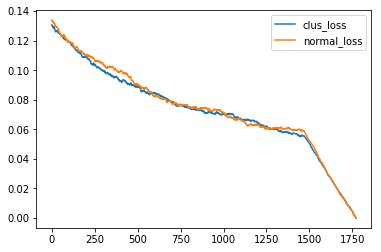

In [200]:

start=400
end  = 10000
window = 300
clus_plot = runningMeanFast(clustered_batch_his.losses[start:end],window)
norm_plot = runningMeanFast(normal_batch_his.losses[start:end],window)
plt.plot(clus_plot, label = "clus_loss")
plt.plot(norm_plot, label= "normal_loss")
plt.legend()
plt.savefig('Keras_deep_cmpGradient_epo'+str(epochs)+'_batsiz'+str(batch_size)+'.png')

In [172]:
np.var(clustered_batch_his.losses[start:end])

0.082280375

In [173]:
np.var(normal_batch_his.losses[start:end])

0.090038016

In [149]:
len(clustered_batch_his.losses)

60

In [ ]:
model.

In [ ]:
model.get_weights()

In [191]:
1

1

In [197]:
np.mean([np.mean(i.losses[-10:]) for i in normal_batch_hises])

0.04575412

In [196]:
np.mean(clustered_batch_his.losses[-10:])

0.054629546

In [207]:
# np.save("losses_of_20_rand_normal",[i.losses for i in normal_batch_hises])

In [36]:
normal_batch_hises = np.load("losses_of_20_rand_normal.npy")

In [69]:
np.save("rand_normal_20_epo4_batch100",normal_batch_hises)

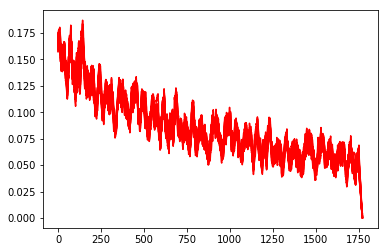

In [37]:
start=400
end  = 10000
window = 20
for i in range(20):
    plt.plot(runningMeanFast(normal_batch_hises[i][start:end],window),color = "red", label= "normal_loss "+str(i))
# plt.legend()
plt.savefig('Keras_deep_cmpGradient_bunchofnormal.png')

In [38]:
who_ls

['Activation',
 'Conv2D',
 'Dense',
 'Dropout',
 'Flatten',
 'K',
 'LossHistory',
 'MaxPooling2D',
 'Sequential',
 'batch_size',
 'clustered_X_train',
 'clustered_Y_train',
 'clustered_x_train',
 'clustered_y_train',
 'counts',
 'datasize',
 'end',
 'epochs',
 'i',
 'img_cols',
 'img_rows',
 'ind',
 'ind1',
 'input_shape',
 'join',
 'keras',
 'listOfIndOfNum',
 'makeModel',
 'makeModel_large',
 'makeModel_small',
 'matplotlib',
 'mixed_ind',
 'mnist',
 'model',
 'normal_batch_hises',
 'np',
 'num_classes',
 'num_each',
 'plt',
 'print_function',
 'rnd_inds',
 'rnd_ys',
 'runningMeanFast',
 'sorted_X_train',
 'sorted_Y_train',
 'start',
 'tf',
 'train_model',
 'train_model_large',
 'train_model_small',
 'unique',
 'window',
 'x_test',
 'x_train',
 'y_test',
 'y_train']

In [43]:
# ?reset_selective -f a

In [39]:
def cluster_shuffle(partitions):
    num_part = len(partitions)
    size_part = min([len(i) for i in partitions])
#     print(num_part)
#     print(size_part)
    shuffled_inds = [ np.random.permutation(size_part) for i in range(num_part)]
#     print (shuffled_inds)
    return [part[inds] for part,inds in zip(partitions,shuffled_inds)]


In [40]:
#let make several random shuffled dataset
clustered_rnd_inds = [join(cluster_shuffle(listOfIndOfNum)) for i in range(20)]


In [42]:
#they come from raw , so we need some processing
# let us make a formated version of the sorted
formatted_sorted_X_train = sorted_X_train.astype("float32")
formatted_sorted_X_train /=255

In [43]:

num_classes = 10
formatted_sorted_Y_train = keras.utils.to_categorical(sorted_Y_train,num_classes)

In [44]:
clustered_rnd_xs = [formatted_sorted_X_train[ind] for ind in clustered_rnd_inds]
clustered_rnd_ys = [formatted_sorted_Y_train[ind] for ind in clustered_rnd_inds]

In [78]:
normal_batch_hises = []
for perm_num_num in range(20):
    with tf.device('/gpu:1'):
        normal_model_his,normal_batch_his = \
            train_model_large(model,rnd_xs[perm_num][:datasize],rnd_ys[perm_num][:datasize],\
                        epochs=epochs,batch_size=batch_size)
        normal_batch_hises.append(normal_batch_his)
np.save("normal_rnd_losses_20_epo"+str(epochs)+"_batch"+str(batch_size),[i.losses for i in normal_batch_hises])

Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1496 - acc: 0.9538    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1459 - acc: 0.9545    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1513 - acc: 0.9535    
Epoch 1/1
54210/54210 [==============================] - 93s - loss: 0.1484 - acc: 0.9547    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1475 - acc: 0.9544    
Epoch 1/1
54210/54210 [==============================] - 93s - loss: 0.1501 - acc: 0.9535    
Epoch 1/1
54210/54210 [==============================] - 96s - loss: 0.1438 - acc: 0.9547    - ETA: 0s - loss: 0.1441 - acc: 0
Epoch 1/1
54210/54210 [==============================] - 98s - loss: 0.1462 - acc: 0.9546    
Epoch 1/1
54210/54210 [==============================] - 98s - loss: 0.1480 - acc: 0.9550    
Epoch 1/1
54210/54210 [==============================] - 98s - loss: 0.1490 - acc: 0.9541    
Epoch 1/1
54210/54210 [====

In [74]:
clustered_batch_hises = []
for perm_num in range(20):
    with tf.device('/gpu:1'):
        clustered_model_his,clutered_batch_his = \
            train_model_large(model,clustered_rnd_xs[perm_num][:datasize],clustered_rnd_ys[perm_num][:datasize],\
                        epochs=epochs,batch_size=batch_size)
        clustered_batch_hises.append(clutered_batch_his)
np.save("clustered_rnd_losses_20_epo"+str(epochs)+"_batch"+str(batch_size),[i.losses for i in clustered_batch_hises])

Epoch 1/1
54210/54210 [==============================] - 95s - loss: 0.1422 - acc: 0.9559    
Epoch 1/1
54210/54210 [==============================] - 96s - loss: 0.1405 - acc: 0.9576    
Epoch 1/1
54210/54210 [==============================] - 94s - loss: 0.1461 - acc: 0.9559    
Epoch 1/1
54210/54210 [==============================] - 93s - loss: 0.1419 - acc: 0.9569    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1411 - acc: 0.9564    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1434 - acc: 0.9556    
Epoch 1/1
54210/54210 [==============================] - 91s - loss: 0.1413 - acc: 0.9569    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1448 - acc: 0.9557    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1429 - acc: 0.9564    
Epoch 1/1
54210/54210 [==============================] - 92s - loss: 0.1450 - acc: 0.9557    
Epoch 1/1
54210/54210 [==============================] - 92s

# 

In [267]:
raw_clustered_rnd_xs[8].shape 

(54210, 28, 28, 1)

In [ ]:
np.array(clustered_rnd_xs).shape

{'batch_size': 100,
 'do_validation': False,
 'epochs': 4,
 'metrics': ['loss', 'acc'],
 'samples': 54210,
 'steps': None,
 'verbose': 1}

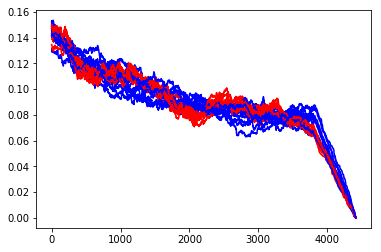

In [88]:
start=1000
end  = 10000
window = 600
for i in range(10):
    plt.plot(runningMeanFast(normal_batch_hises[i].losses[start:end],window),color = "red", label= "normal_loss"+str(i))
    plt.plot(runningMeanFast(clustered_batch_hises[i].losses[start:end],window),color="blue", label = "clustered")
# plt.legend()
plt.savefig('Keras_deep_cmpGradient_bunchofnormal.png')


In [ ]:
clustered_batch_hises[i].losses

In [68]:
# np.save("clustered_rnd_losses_20_epo4_batch100",[i.losses for i in clustered_batch_hises])

In [75]:
whos

Variable                   Type                   Data/Info
-----------------------------------------------------------
Activation                 type                   <class 'keras.layers.core.Activation'>
Conv2D                     type                   <class 'keras.layers.convolutional.Conv2D'>
Dense                      type                   <class 'keras.layers.core.Dense'>
Dropout                    type                   <class 'keras.layers.core.Dropout'>
Flatten                    type                   <class 'keras.layers.core.Flatten'>
K                          module                 <module 'keras.backend' f<...>as/backend/__init__.pyc'>
LossHistory                type                   <class '__main__.LossHistory'>
MaxPooling2D               type                   <class 'keras.layers.pooling.MaxPooling2D'>
Sequential                 type                   <class 'keras.models.Sequential'>
batch_size                 int                    10
cluster_shuffle        

# next

1. chechk the val loss see which one overfit?

2. different clustering method , different number of clusters

# current result
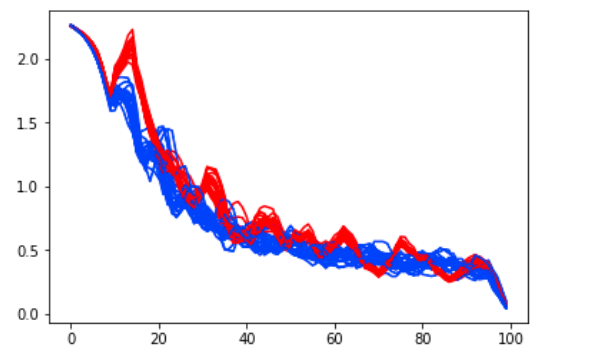

this is the first several batch for 4 epoch , 100 batch size
it is a drawing of 20 random order of batches
it is quite clear that the clutered is more stable initially

this may because initially the clustered batch gives a much much representative data set,
for problems that initiali  divergence is large this may be potentially helpful